<a href="https://colab.research.google.com/github/Kanishk-s/c-classes/blob/main/stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Import the libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Load the data
from google.colab import files
files.upload()

Saving RELIANCEdata(xx2) (2).csv to RELIANCEdata(xx2) (2).csv


{'RELIANCEdata(xx2) (2).csv': b'days,Open,High,Low,Close,Adj Close,Volume\r\n2022-01-03,2365,2407.949951,2363.550049,2403.850098,2403.850098,2502073\r\n2022-01-04,2415.899902,2461,2404,2458.100098,2458.100098,5006225\r\n2022-01-05,2462,2477,2432.949951,2469.600098,2469.600098,5373618\r\n2022-01-06,2451.199951,2454,2409,2416.5,2416.5,6667483\r\n2022-01-07,2430.949951,2458.050049,2411.550049,2436,2436,6051239\r\n2022-01-10,2452,2457,2416.050049,2438,2438,4267365\r\n2022-01-11,2436,2474.949951,2435,2455.550049,2455.550049,7478681\r\n2022-01-12,2471.300049,2524.949951,2465,2521.100098,2521.100098,6830402\r\n2022-01-13,2521.25,2541,2508.399902,2535.300049,2535.300049,5471871\r\n2022-01-14,2535,2567.300049,2525.850098,2539,2539,9197773\r\n2022-01-17,2538,2565,2537,2552.25,2552.25,3708822\r\n2022-01-18,2554.75,2562.350098,2515.75,2521.800049,2521.800049,2868235\r\n2022-01-19,2530,2542,2509,2521.600098,2521.600098,4502155\r\n2022-01-20,2500.050049,2509.949951,2455,2477.449951,2477.449951,76122

In [4]:
#Store the data
df=pd.read_csv('RELIANCEdata(xx2) (2).csv')
#Show the data
df

,days,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,2365.000000,2407.949951,2363.550049,2403.850098,2403.850098,2502073
1,2022-01-04,2415.899902,2461.000000,2404.000000,2458.100098,2458.100098,5006225
2,2022-01-05,2462.000000,2477.000000,2432.949951,2469.600098,2469.600098,5373618
3,2022-01-06,2451.199951,2454.000000,2409.000000,2416.500000,2416.500000,6667483
4,2022-01-07,2430.949951,2458.050049,2411.550049,2436.000000,2436.000000,6051239
5,2022-01-10,2452.000000,2457.000000,2416.050049,2438.000000,2438.000000,4267365
6,2022-01-11,2436.000000,2474.949951,2435.000000,2455.550049,2455.550049,7478681
7,2022-01-12,2471.300049,2524.949951,2465.000000,2521.100098,2521.100098,6830402
8,2022-01-13,2521.250000,2541.000000,2508.399902,2535.300049,2535.300049,5471871
9,2022-01-14,2535.000000,2567.300049,2525.850098,2539.000000,2539.000000,9197773


In [6]:
#Show and store the last row of data
actual_price=df.tail(1)
#Show the data
actual_price

,days,Open,High,Low,Close,Adj Close,Volume
18,2022-28-01,2365.0,2375.899902,2328.399902,2335.850098,2335.850098,6769154


In [7]:
#Get all of the data except the last row
df=df.head(len(df)-1)
#Show the data set
df

,days,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,2365.000000,2407.949951,2363.550049,2403.850098,2403.850098,2502073
1,2022-01-04,2415.899902,2461.000000,2404.000000,2458.100098,2458.100098,5006225
2,2022-01-05,2462.000000,2477.000000,2432.949951,2469.600098,2469.600098,5373618
3,2022-01-06,2451.199951,2454.000000,2409.000000,2416.500000,2416.500000,6667483
4,2022-01-07,2430.949951,2458.050049,2411.550049,2436.000000,2436.000000,6051239
5,2022-01-10,2452.000000,2457.000000,2416.050049,2438.000000,2438.000000,4267365
6,2022-01-11,2436.000000,2474.949951,2435.000000,2455.550049,2455.550049,7478681
7,2022-01-12,2471.300049,2524.949951,2465.000000,2521.100098,2521.100098,6830402
8,2022-01-13,2521.250000,2541.000000,2508.399902,2535.300049,2535.300049,5471871
9,2022-01-14,2535.000000,2567.300049,2525.850098,2539.000000,2539.000000,9197773


In [10]:
#Create empty lists.
days=list()
adj_close_prices=list()

In [11]:
#Get only the dates and the adjusted close prices.
df_days=df.loc[:, 'days']
df_adj_close=df.loc[:,'Adj Close']

In [13]:
#Create the independent data set(dates)
for day in df_days:
  days.append([int(day.split('-')[2])])
#Create the dependent data set(adj close prices)
for adj_close_price in df_adj_close:
  adj_close_prices.append(float(adj_close_price))

In [14]:
days

[[3],
 [4],
 [5],
 [6],
 [7],
 [10],
 [11],
 [12],
 [13],
 [14],
 [17],
 [18],
 [19],
 [20],
 [21],
 [24],
 [25],
 [27]]

In [15]:
#Show teh adj close prices
adj_close_prices

[2403.850098,
 2458.100098,
 2469.600098,
 2416.5,
 2436.0,
 2438.0,
 2455.550049,
 2521.100098,
 2535.300049,
 2539.0,
 2552.25,
 2521.800049,
 2521.600098,
 2477.449951,
 2477.850098,
 2377.899902,
 2373.25,
 2338.100098]

In [17]:
#Create3models
lin_svr =SVR(kernel= 'linear',C=1000.0)
lin_svr.fit(days,adj_close_prices)

poly_svr =SVR(kernel='poly',C=1000.0,degree=2)
poly_svr.fit(days,adj_close_prices)
                                                    
rbf_svr= SVR(kernel='rbf',C=1000.0,gamma=0.85)
rbf_svr.fit(days,adj_close_prices)

SVR(C=1000.0, gamma=0.85)

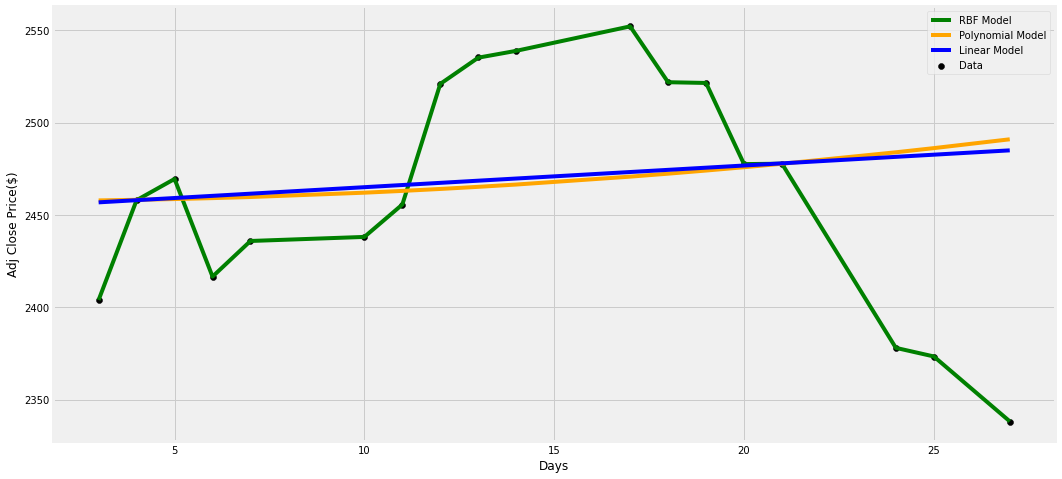

In [18]:
#Plot the models
plt.figure(figsize=(16,8))
plt.scatter(days,adj_close_prices,color='black',label='Data')
plt.plot(days,rbf_svr.predict(days),color='green',label='RBF Model')
plt.plot(days,poly_svr.predict(days), color='orange',label='Polynomial Model')
plt.plot(days,lin_svr.predict(days),color='blue',label='Linear Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price($)')
plt.legend()
plt.show()
                                        
                                        
                                        

In [22]:
#Show the predicted price for the given day
day=[[27]]
print('The RBF SVR predicted price:',rbf_svr.predict(day))
print('The Linear SVR predicted price:',lin_svr.predict(day))
print('The Polynomial SVR predicted price:',poly_svr.predict(day))

The RBF SVR predicted price: [2338.20021644]
The Linear SVR predicted price: [2484.99127447]
The Polynomial SVR predicted price: [2490.9802234]


In [28]:
#Show the actual price.
print('The actual price:',actual_price['Adj Close'][18])

The actual price: 2335.850098
